In [3]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import allel
import seaborn as sns
import allel
import os
import pickle

import dask.dataframe as dd

In [4]:
dict_snps = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/key_files/var_pos_grenenet.csv'
dict_snps = pd.read_csv(dict_snps)

In [5]:
!pwd

/carnegie/nobackup/scratch/tbellagio/gea_grene-net/gwas/allele_assoc_runs/only_grenenet


In [6]:
dict_blocks = '/home/tbellagio/HapFM/blocks_snpsid_dict.pkl'

path = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/gwas/allele_assoc_runs/only_grenenet'

path_gemma = path + '/lmm_gemma'

In [7]:
with open(dict_blocks, 'rb') as file:
    dict_blocks = pickle.load(file)

In [8]:
dict_blocks_inv = {}

# Iterate through the original dictionary
for key, values in dict_blocks.items():
    for value in values:
        dict_blocks_inv[value] = key

In [9]:
biovars = [i for i in os.listdir(path_gemma) if 'bio' in i]

In [10]:
biovars

['bio4',
 'bio17',
 'bio10',
 'bio9',
 'bio3',
 'bio14',
 'bio7',
 'bio13',
 'bio19',
 'bio11',
 'bio2',
 'bio8',
 'bio5',
 'bio16',
 'bio1',
 'bio18',
 'bio12',
 'bio15',
 'bio6']

In [11]:
biovar = 'bio1'

In [12]:
assoc = pd.read_csv(path + f'/lmm_gemma/{biovar}/output/{biovar}.assoc.txt', sep = '\t')

In [11]:
os.listdir('lmm_gemma/')

['bio4',
 'bio17',
 'bio10',
 'bio9',
 'bio3',
 'bio14',
 'bio7',
 '.ipynb_checkpoints',
 'bio13',
 'bio19',
 'bio11',
 'bio2',
 'bio8',
 'bio5',
 'bio16',
 'bio1',
 'bio18',
 'bio12',
 'bio15',
 'bio6']

In [12]:
assoc

,chr,rs,ps,n_miss,allele1,allele0,af,beta,se,logl_H1,l_remle,p_wald
0,1,1_346,346,0,T,C,0.273,0.554357,0.297446,-530.4684,0.467894,0.063763
1,1,1_353,353,0,A,G,0.069,-0.034376,0.471484,-532.1836,0.457323,0.941947
2,1,1_363,363,0,G,C,0.082,0.158310,0.406098,-532.1173,0.452160,0.697057
3,1,1_395,395,0,T,A,0.056,-0.034630,0.578647,-532.1914,0.456340,0.952335
4,1,1_396,396,0,A,T,0.056,-0.034630,0.578647,-532.1914,0.456340,0.952335
...,...,...,...,...,...,...,...,...,...,...,...,...
1147887,5,5_26975078,26975078,0,T,A,0.139,-0.183981,0.366924,-532.0665,0.447363,0.616608
1147888,5,5_26975121,26975121,0,A,G,0.061,0.063897,0.478592,-532.1897,0.458850,0.893918
1147889,5,5_26975148,26975148,0,G,A,0.061,0.063897,0.478592,-532.1897,0.458850,0.893918
1147890,5,5_26975272,26975272,0,T,C,0.385,-0.224204,0.253094,-531.8048,0.462716,0.376715


In [13]:
biovars = [ 'bio1',
    'bio7',
 'bio19',
 'bio13',
 'bio14',
 'bio4',
 'bio10',
 'bio17',
 'bio9',
 'bio3',

 'bio15',
 'bio12',
 'bio18',
 'bio6',
 'bio2',
 'bio8',
 'bio16',
 'bio11',
 'bio5']


In [14]:
for biovar in biovars:
    assoc = pd.read_csv(path + f'/lmm_gemma/{biovar}/output/{biovar}.assoc.txt', sep = '\t')
    th = 0.05 / len(assoc)
    # Add a new column 'significant' based on the condition
    assoc['significant'] = assoc['p_wald'] < th
    print(assoc['significant'].value_counts())
    assoc['blocks'] = assoc['rs'].map(dict_blocks_inv) 
    assoc[['rs','p_wald', 'beta', 'significant', 'blocks', 'af']].to_csv(path + f'/lmm_gemma/{biovar}/output/results_lmm.csv', index=None)

significant
False    1147873
True          19
Name: count, dtype: int64
significant
False    1147884
True           8
Name: count, dtype: int64
significant
False    1147877
True          15
Name: count, dtype: int64
significant
False    1147885
True           7
Name: count, dtype: int64
significant
False    1147890
True           2
Name: count, dtype: int64
significant
False    1147462
True         430
Name: count, dtype: int64
significant
False    1147836
True          56
Name: count, dtype: int64
significant
False    1147890
True           2
Name: count, dtype: int64
significant
False    1147856
True          36
Name: count, dtype: int64
significant
False    1147885
True           7
Name: count, dtype: int64
significant
False    1147878
True          14
Name: count, dtype: int64
significant
False    1147889
True           3
Name: count, dtype: int64
significant
False    1147875
True          17
Name: count, dtype: int64
significant
False    1147891
True           1
Name: count, dtype

In [19]:
pwd -P

'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/gwas/allele_assoc_runs'

In [7]:
biovar = 'bio1'

In [9]:
!pwd

/carnegie/nobackup/scratch/tbellagio/gea_grene-net/gwas/allele_assoc_runs


In [8]:
pd.read_csv(path + f'/lmm_gemma/{biovar}/output/results_lmm.csv')

,rs,p_wald,beta,significant,blocks
0,1_346,0.968957,0.003763,False,1_0
1,1_353,0.873885,0.022961,False,1_0
2,1_363,0.321075,0.134849,False,1_0
3,1_425,0.944488,-0.008280,False,1_0
4,1_471,0.976653,-0.003523,False,1_0
...,...,...,...,...,...
1091488,5_26974820,0.501374,0.087008,False,5_3110
1091489,5_26975046,0.395818,-0.087317,False,5_3110
1091490,5_26975078,0.756337,-0.035614,False,5_3110
1091491,5_26975272,0.786997,0.022981,False,5_3110


In [15]:
biovars

['bio1',
 'bio7',
 'bio19',
 'bio13',
 'bio14',
 'bio4',
 'bio10',
 'bio17',
 'bio9',
 'bio3',
 'bio15',
 'bio12',
 'bio18',
 'bio6',
 'bio2',
 'bio8',
 'bio16',
 'bio11',
 'bio5']

In [17]:
pvalues

,rs,p_wald,beta,significant,blocks,af
0,1_346,0.063763,0.554357,False,1_0,0.273
1,1_353,0.941947,-0.034376,False,1_0,0.069
2,1_363,0.697057,0.158310,False,1_0,0.082
3,1_395,0.952335,-0.034630,False,1_0,0.056
4,1_396,0.952335,-0.034630,False,1_0,0.056
...,...,...,...,...,...,...
1147887,5_26975078,0.616608,-0.183981,False,5_3110,0.139
1147888,5_26975121,0.893918,0.063897,False,5_3110,0.061
1147889,5_26975148,0.893918,0.063897,False,5_3110,0.061
1147890,5_26975272,0.376715,-0.224204,False,5_3110,0.385


In [13]:
biovars = ['bio1']

In [14]:
biovar = 'bio1'

In [17]:
pvalues_file = path + f'/lmm_gemma/{biovar}/output/results_lmm.csv'

pvalues = dd.read_csv(pvalues_file)
pvalues = pvalues.compute()

/tmp/ipykernel_88061/110252499.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


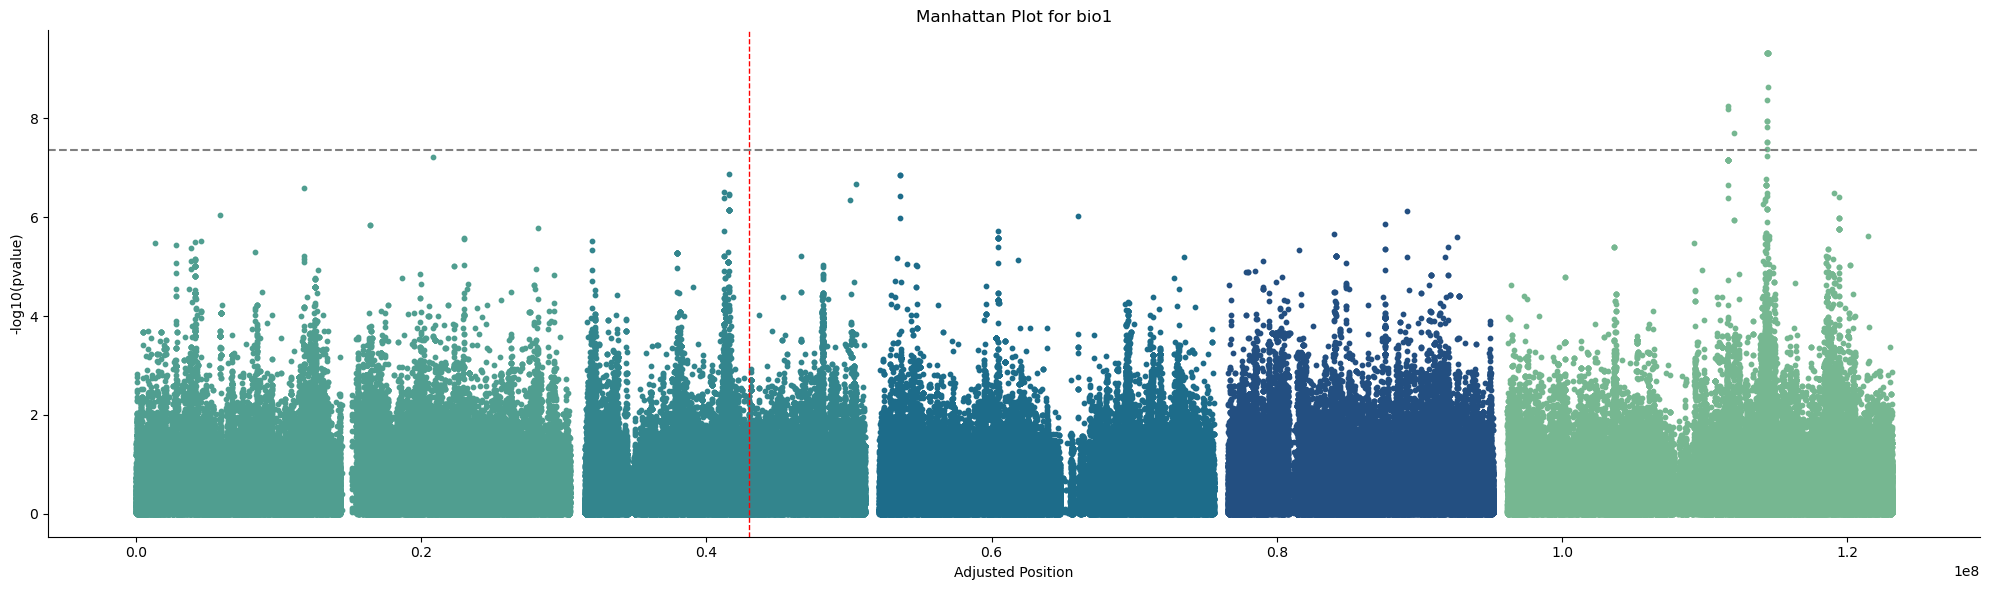

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import dask.dataframe as dd  # Assuming dd is already imported as dask.dataframe

for biovar in biovars:
    pvalues_file = path + f'/lmm_gemma/{biovar}/output/results_lmm.csv'
    
    pvalues = dd.read_csv(pvalues_file)
    pvalues = pvalues.compute()
    
    pvalues.columns = ['id', 'pvalue', 'beta', 'significant', 'blocks', 'af']
    
    threshold_value = 0.05 / len(pvalues)
    
    df = pvalues.copy()
    
    colors = sns.color_palette("crest", n_colors=5)
    
    # Parsing chromosome number and position
    df['chromosome'] = df['id'].str.split('_').str[0].astype(int)
    df['position'] = df['id'].str.split('_').str[1].astype(int)
    df['-log10(pvalue)'] = -np.log10(df['pvalue'])
    
    # Calculate the offset for each chromosome to prevent overlap
    chromosome_offsets = {}
    offset = 0
    for chrom in sorted(df['chromosome'].unique()):
        chromosome_offsets[chrom] = offset
        max_position = df[df['chromosome'] == chrom]['position'].max()
        offset += max_position + 1000000  # Adding 1 million as a buffer between chromosomes
    
    # Apply offsets to positions
    df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)
    
    # Creating the Manhattan plot
    plt.figure(figsize=(20, 6))
    
    for chrom in sorted(df['chromosome'].unique()):
        subset = df[df['chromosome'] == chrom]
        plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)
    
    # Add vertical line for chromosome 2 at position 1265
    cam5 = df[df['blocks'] == '2_1265']
    cam5 = cam5.sample(1)
    plt.axvline(x=cam5['adjusted_position'].values[0], color='red', linestyle='dashed', linewidth=1)
    
    # Aesthetics
    plt.xlabel('Adjusted Position')
    plt.ylabel('-log10(pvalue)')
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    threshold = -np.log10(threshold_value)
    plt.axhline(y=threshold, color='grey', linestyle='dashed')
    plt.title(f'Manhattan Plot for {biovar}')
    
    plt.tight_layout()
    plt.show()


<Axes: xlabel='beta', ylabel='Count'>

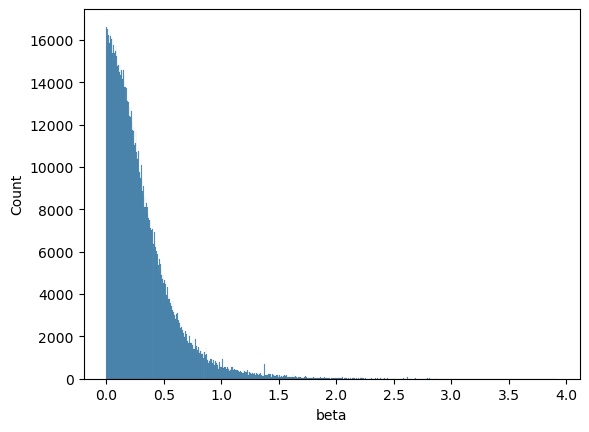

In [24]:
sns.histplot(abs(df['beta']))

<Axes: xlabel='beta', ylabel='Count'>

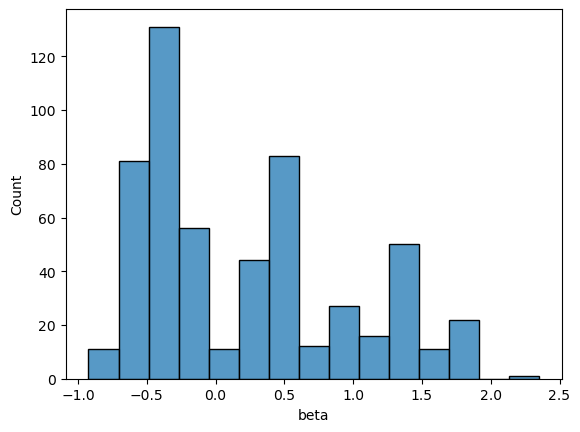

In [40]:
sns.histplot(df[df['blocks'] == '4_2320']['beta'])

In [36]:
df[df['blocks'] == '2_1265']

,id,pvalue,beta,significant,blocks,af,chromosome,position,-log10(pvalue),adjusted_position
411400,2_11533904,0.018021,1.049685,False,2_1265,0.069,2,11533904,1.744223,42956602
411401,2_11533937,0.113516,0.736603,False,2_1265,0.061,2,11533937,0.944943,42956635
411402,2_11533991,0.018021,1.049685,False,2_1265,0.069,2,11533991,1.744223,42956689
411403,2_11533994,0.018021,1.049685,False,2_1265,0.069,2,11533994,1.744223,42956692
411404,2_11534015,0.018021,1.049685,False,2_1265,0.069,2,11534015,1.744223,42956713
411405,2_11534022,0.018021,1.049685,False,2_1265,0.069,2,11534022,1.744223,42956720
411406,2_11534023,0.018021,1.049685,False,2_1265,0.069,2,11534023,1.744223,42956721
411407,2_11534048,0.018021,1.049685,False,2_1265,0.069,2,11534048,1.744223,42956746
411408,2_11534063,0.004201,1.043037,False,2_1265,0.113,2,11534063,2.376693,42956761
411409,2_11534094,0.009612,1.135721,False,2_1265,0.069,2,11534094,2.017180,42956792


In [25]:
cam5 = df[df['blocks'] == '2_1265']

In [29]:
cam5 = cam5.sample(1)

In [33]:
cam5['adjusted_position'].values[0]

42956797

/tmp/ipykernel_4092025/3121438498.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


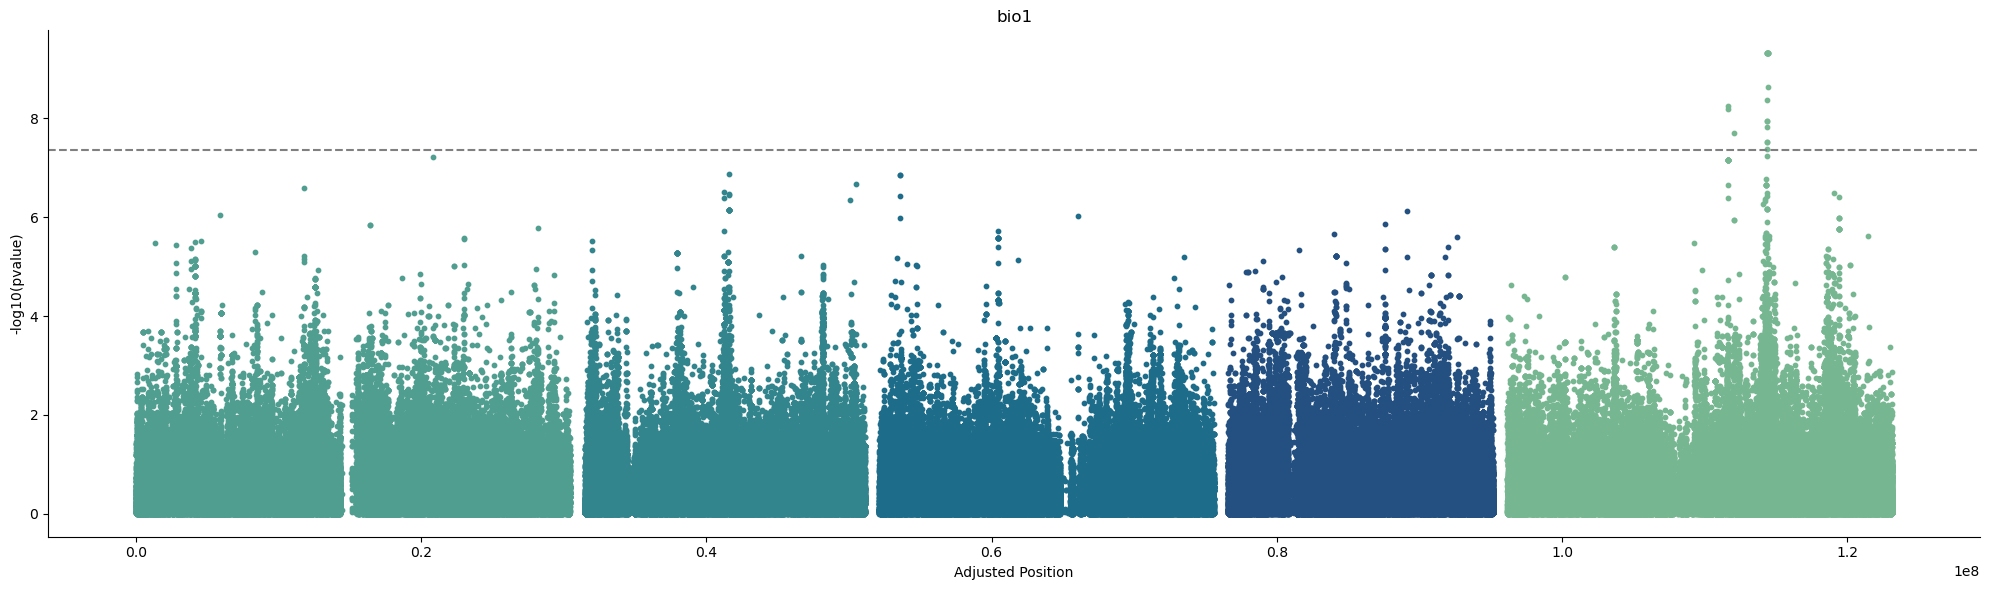

/tmp/ipykernel_4092025/3121438498.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


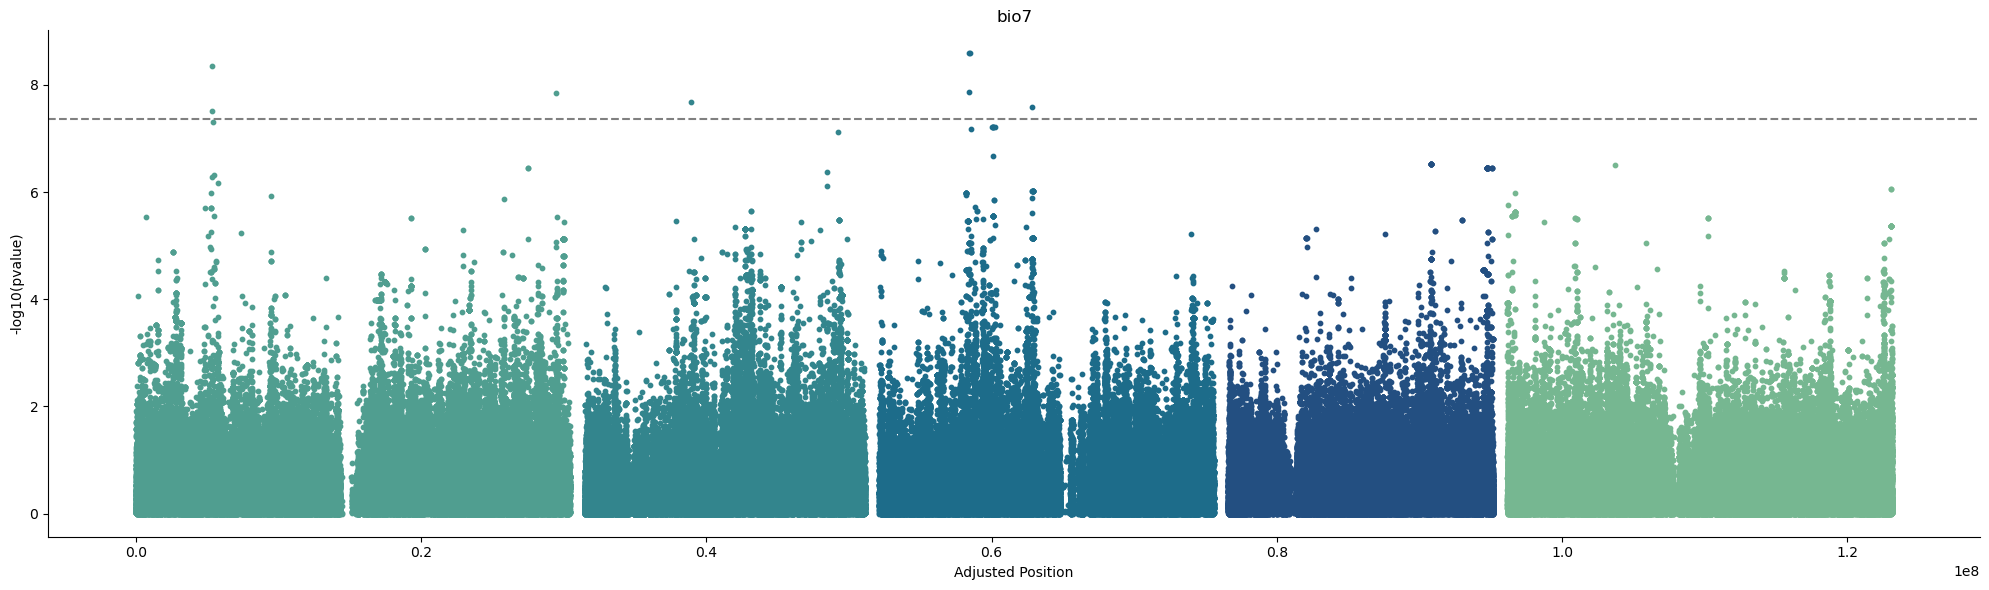

/tmp/ipykernel_4092025/3121438498.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


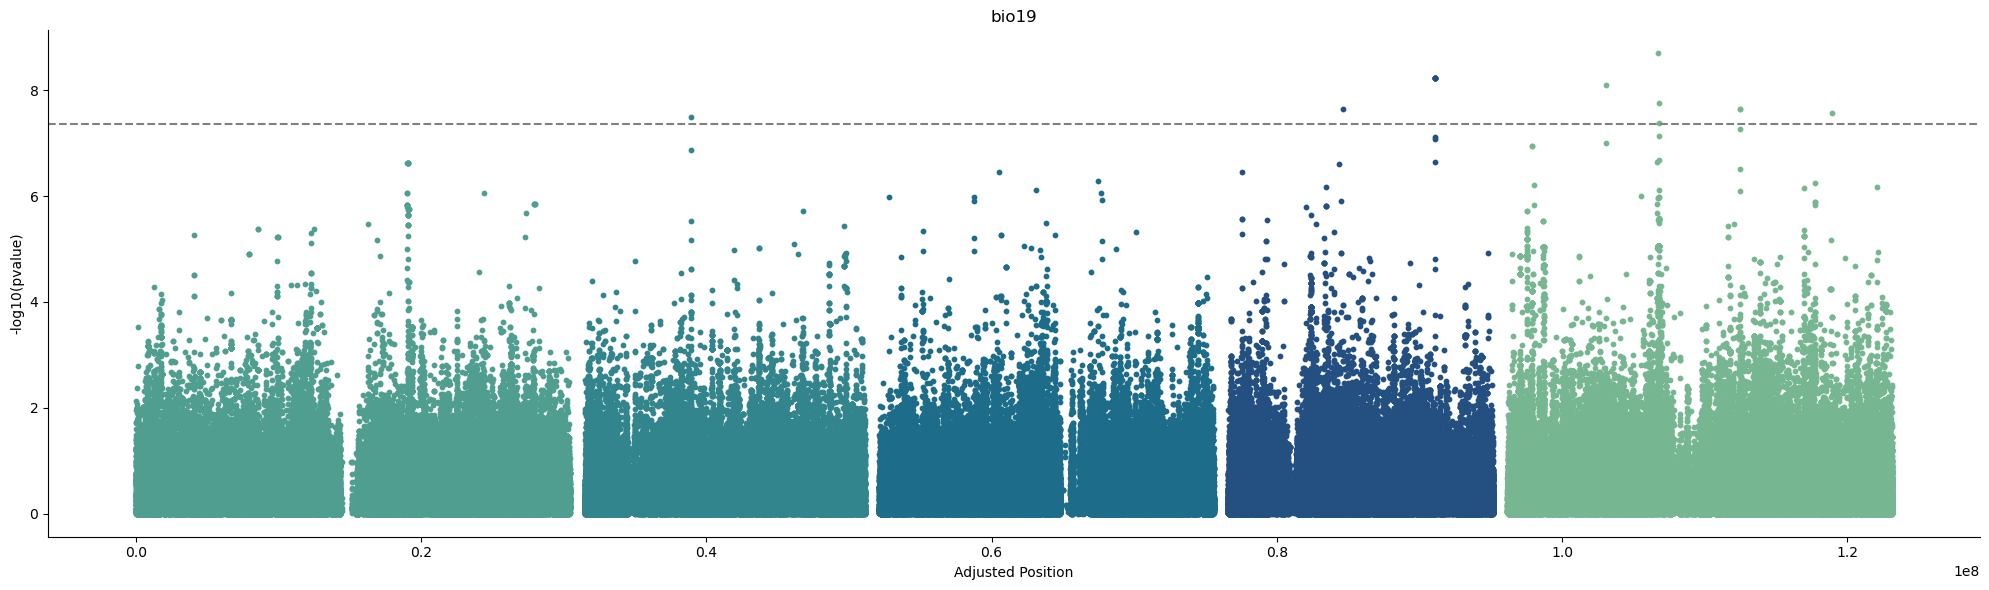

/tmp/ipykernel_4092025/3121438498.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


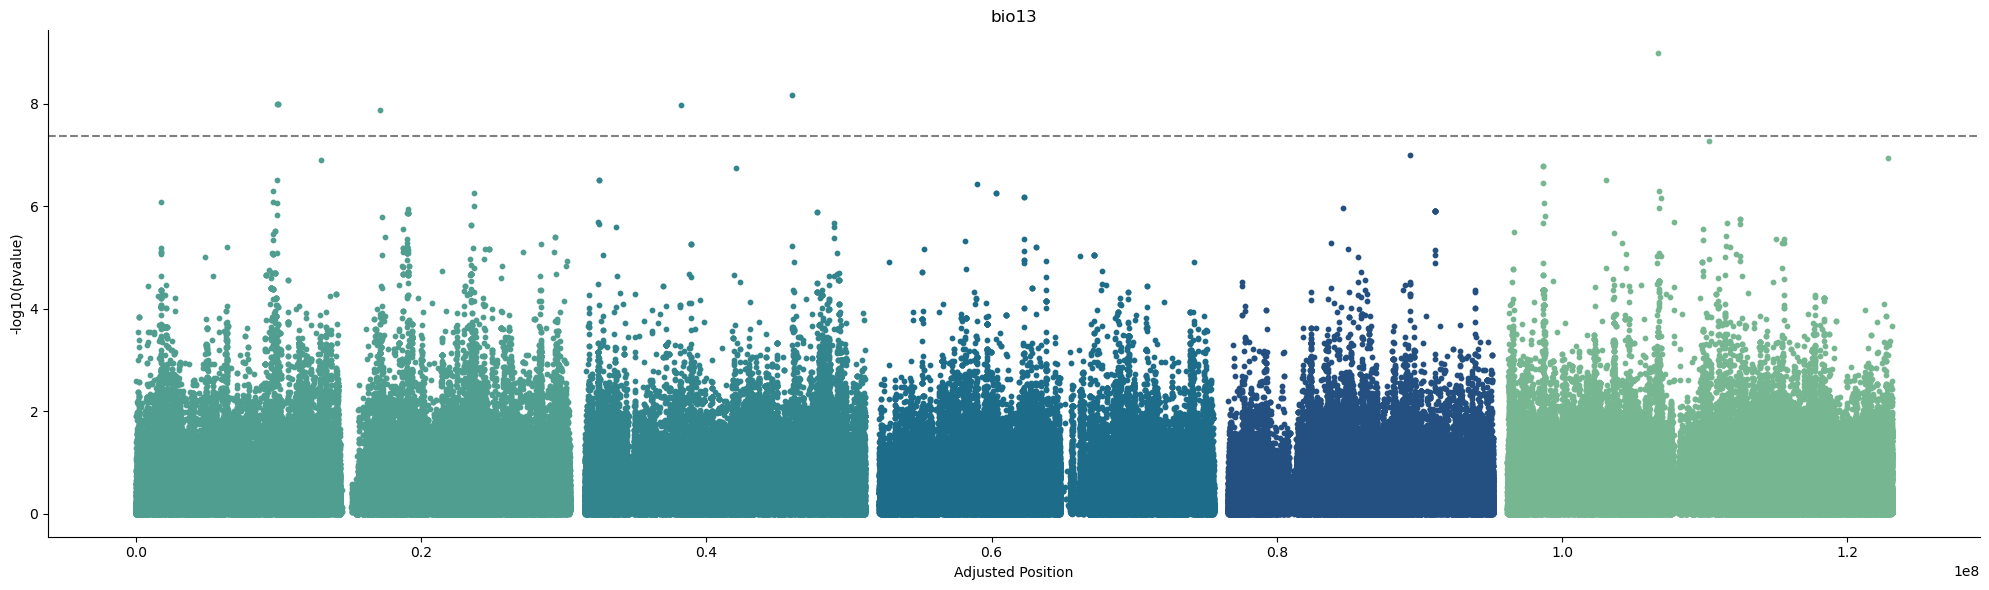

/tmp/ipykernel_4092025/3121438498.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


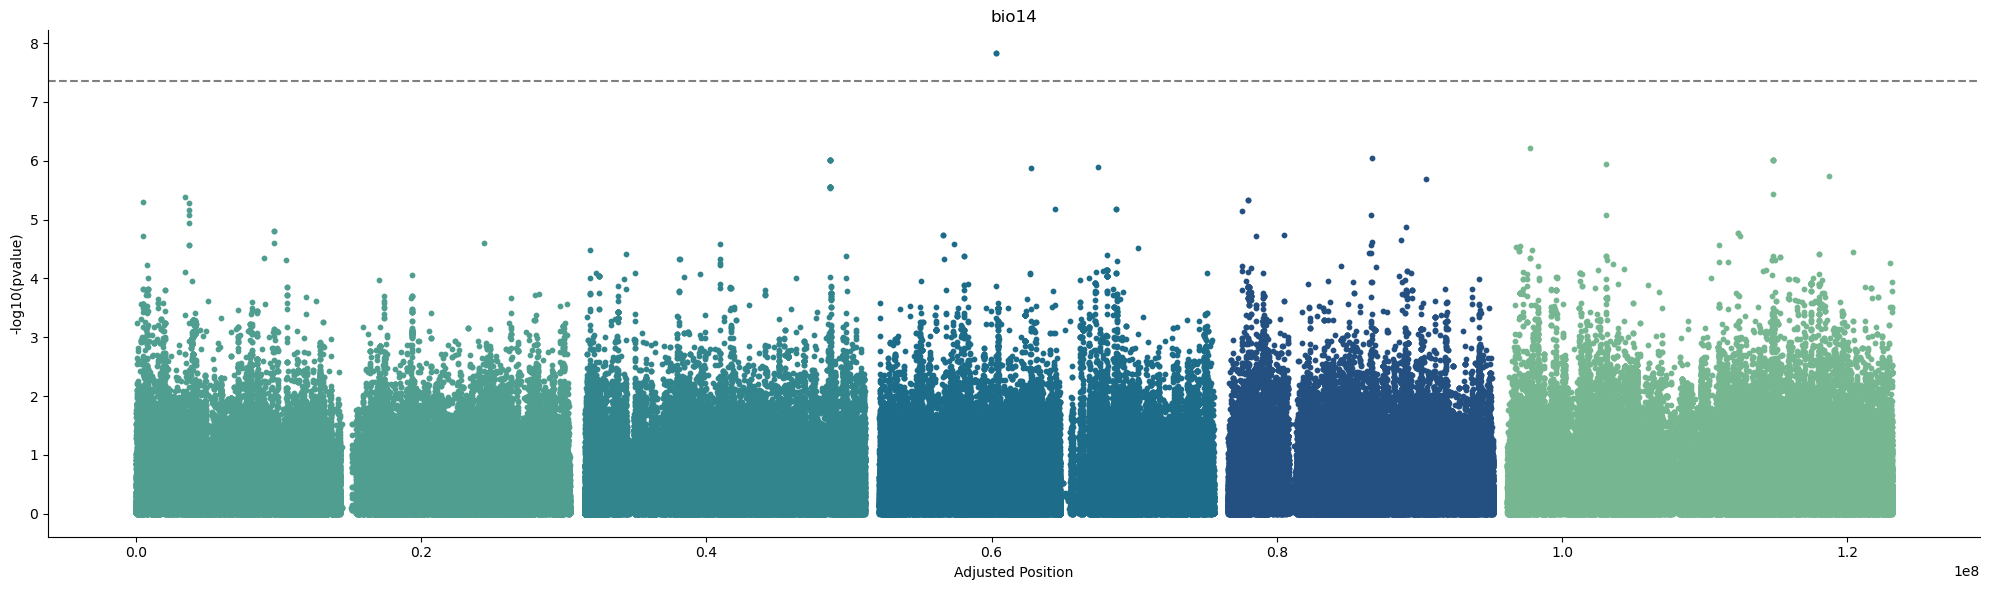

/tmp/ipykernel_4092025/3121438498.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


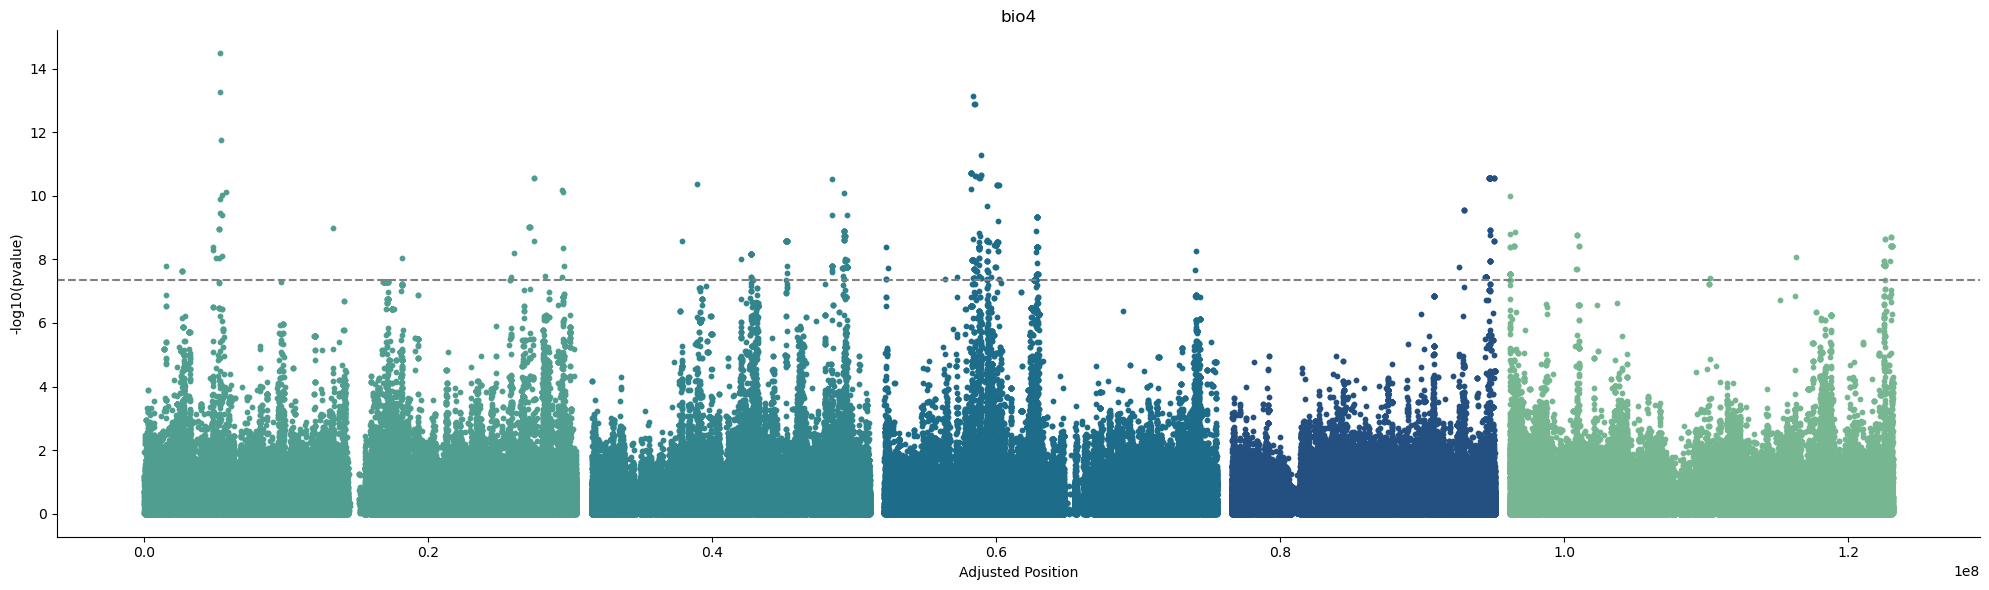

/tmp/ipykernel_4092025/3121438498.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


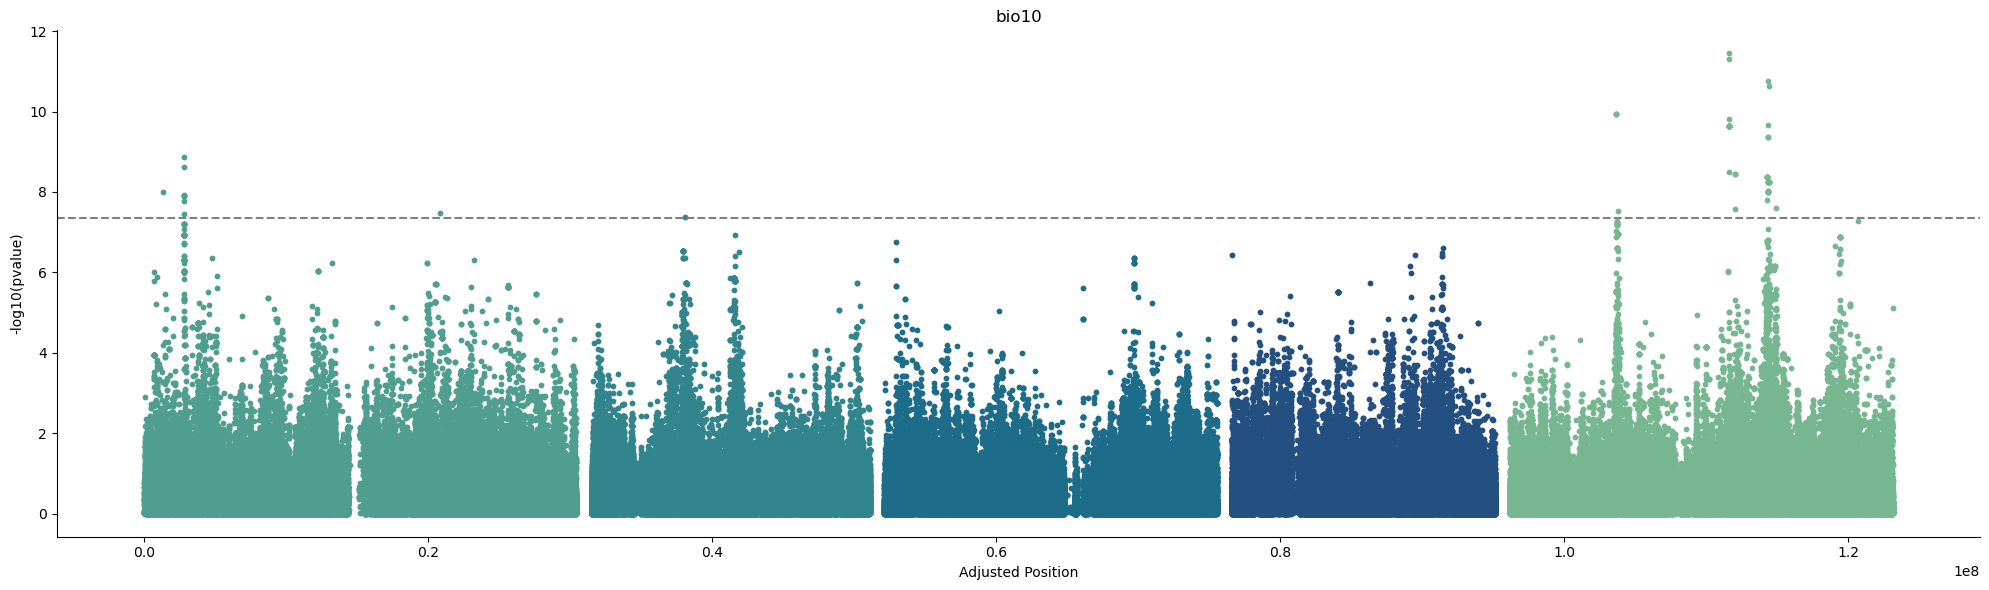

/tmp/ipykernel_4092025/3121438498.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


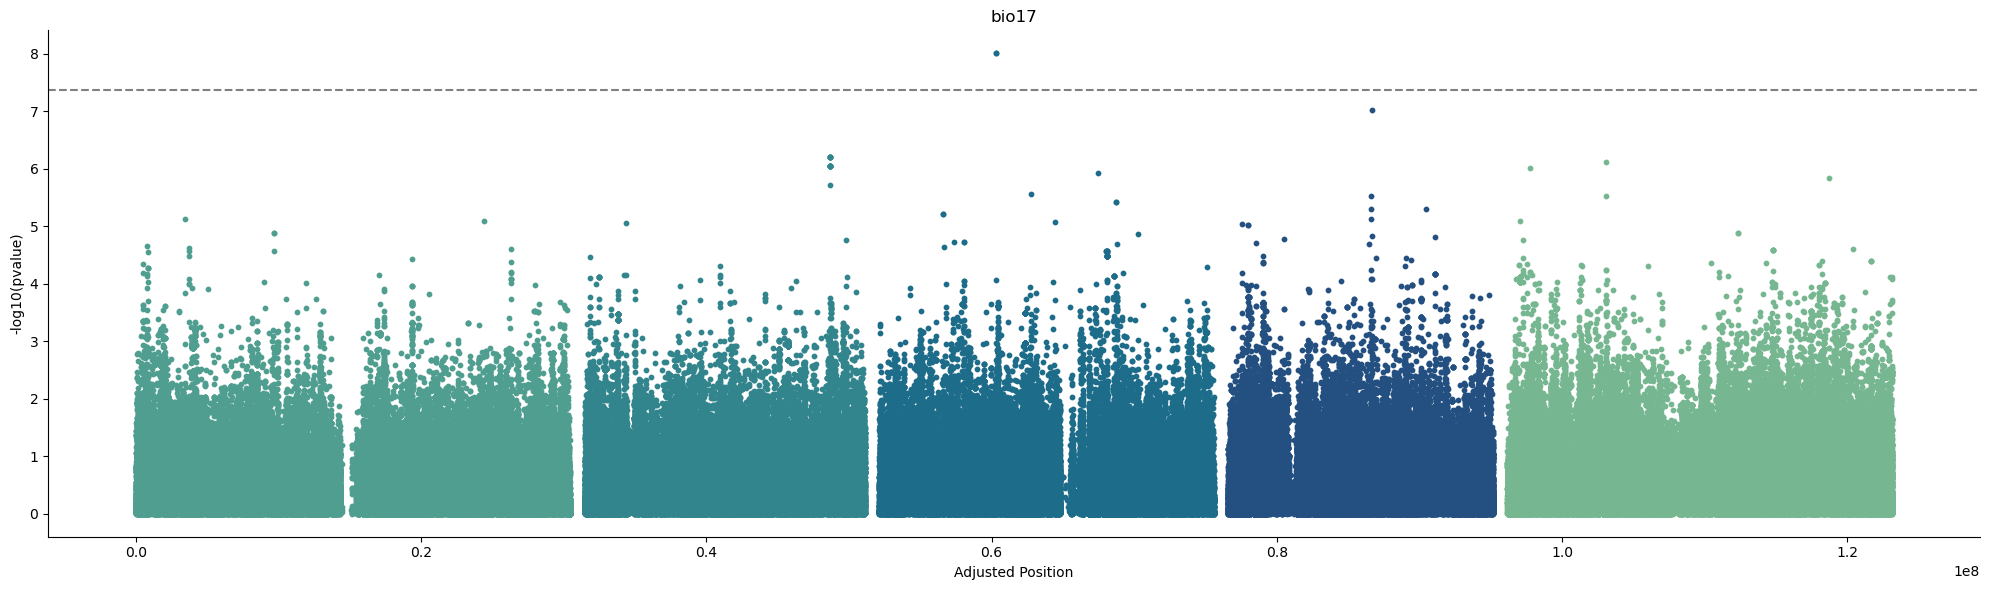

/tmp/ipykernel_4092025/3121438498.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


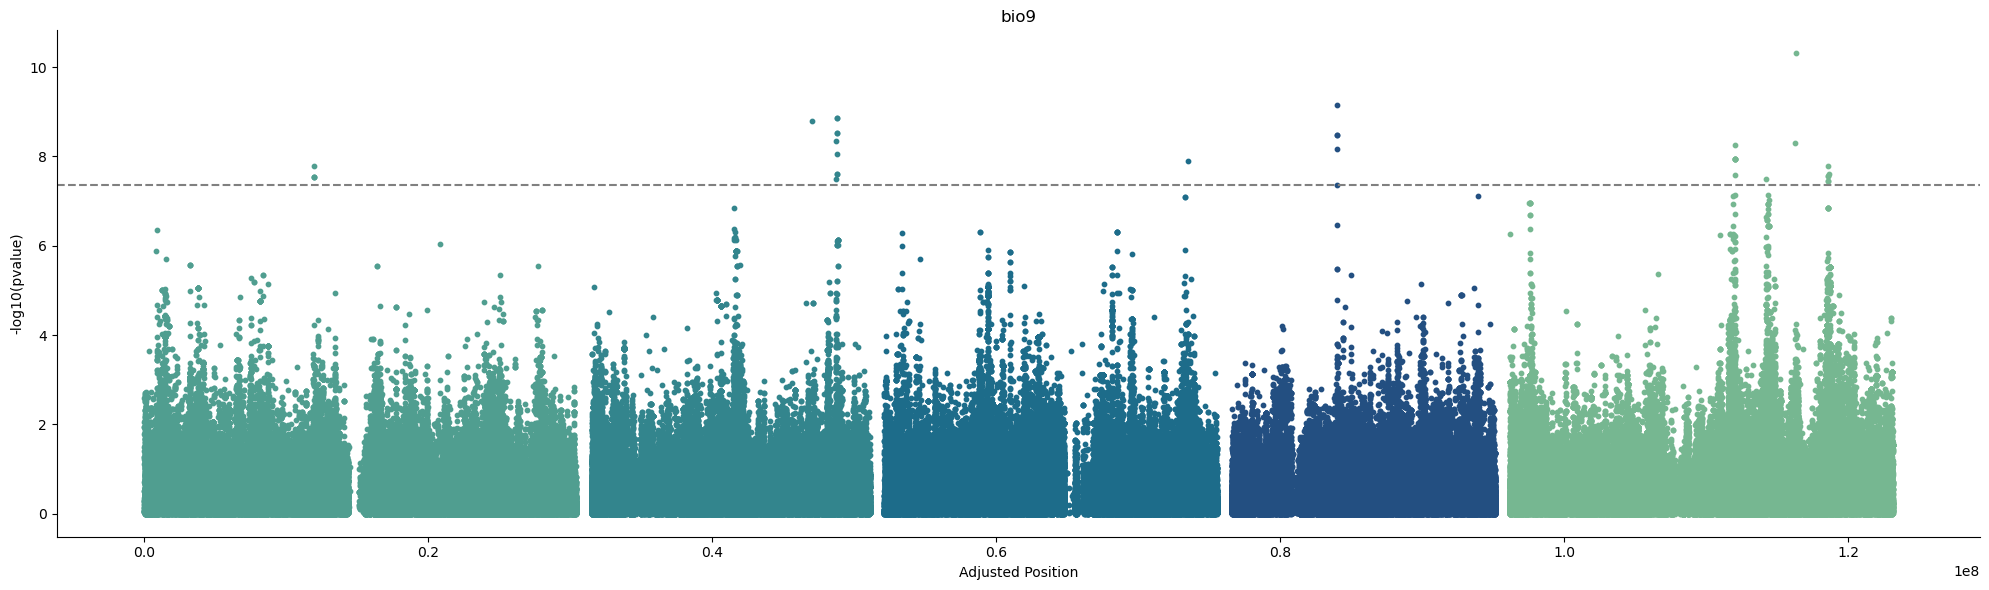

/tmp/ipykernel_4092025/3121438498.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


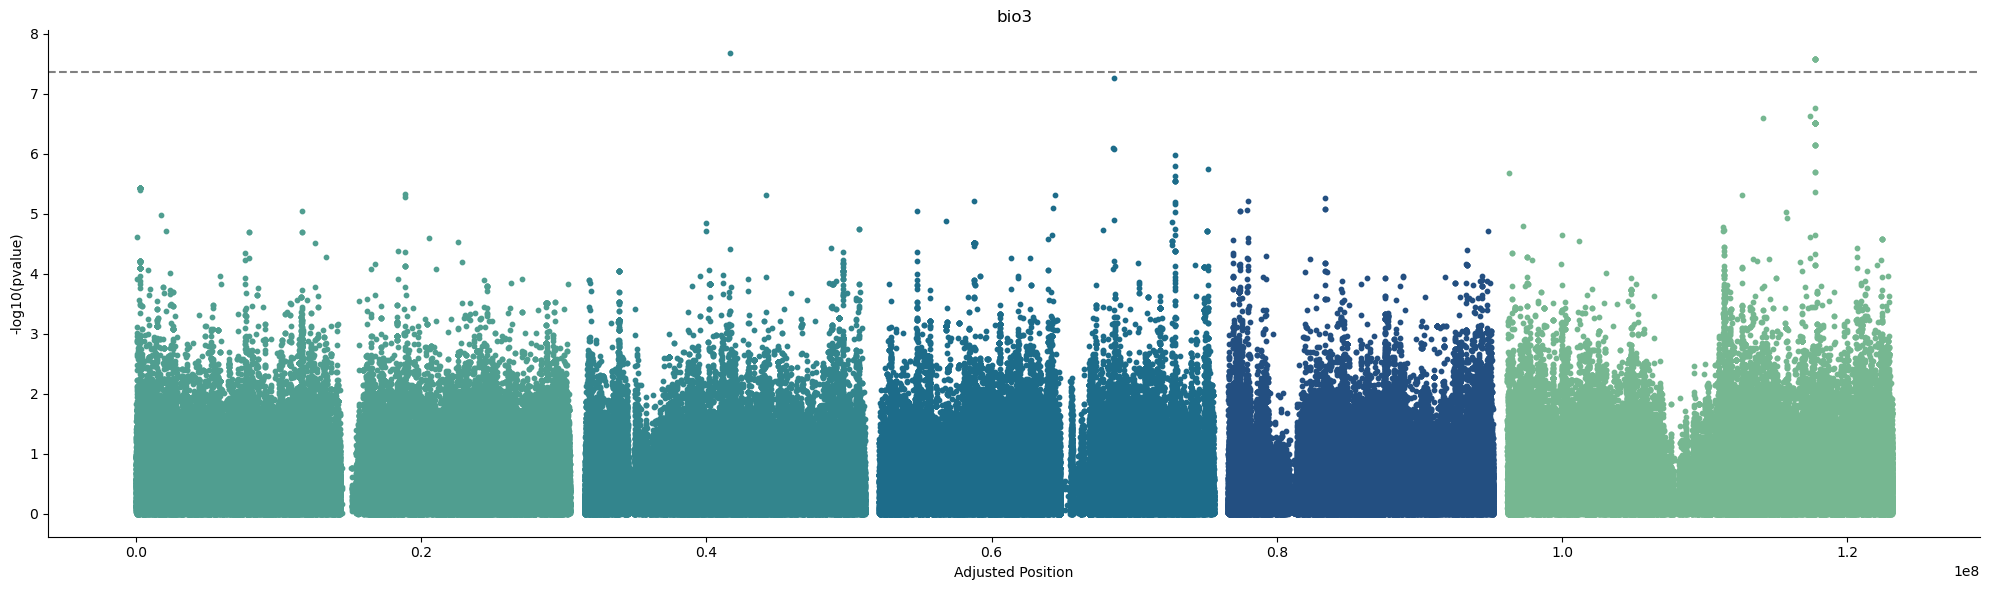

/tmp/ipykernel_4092025/3121438498.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


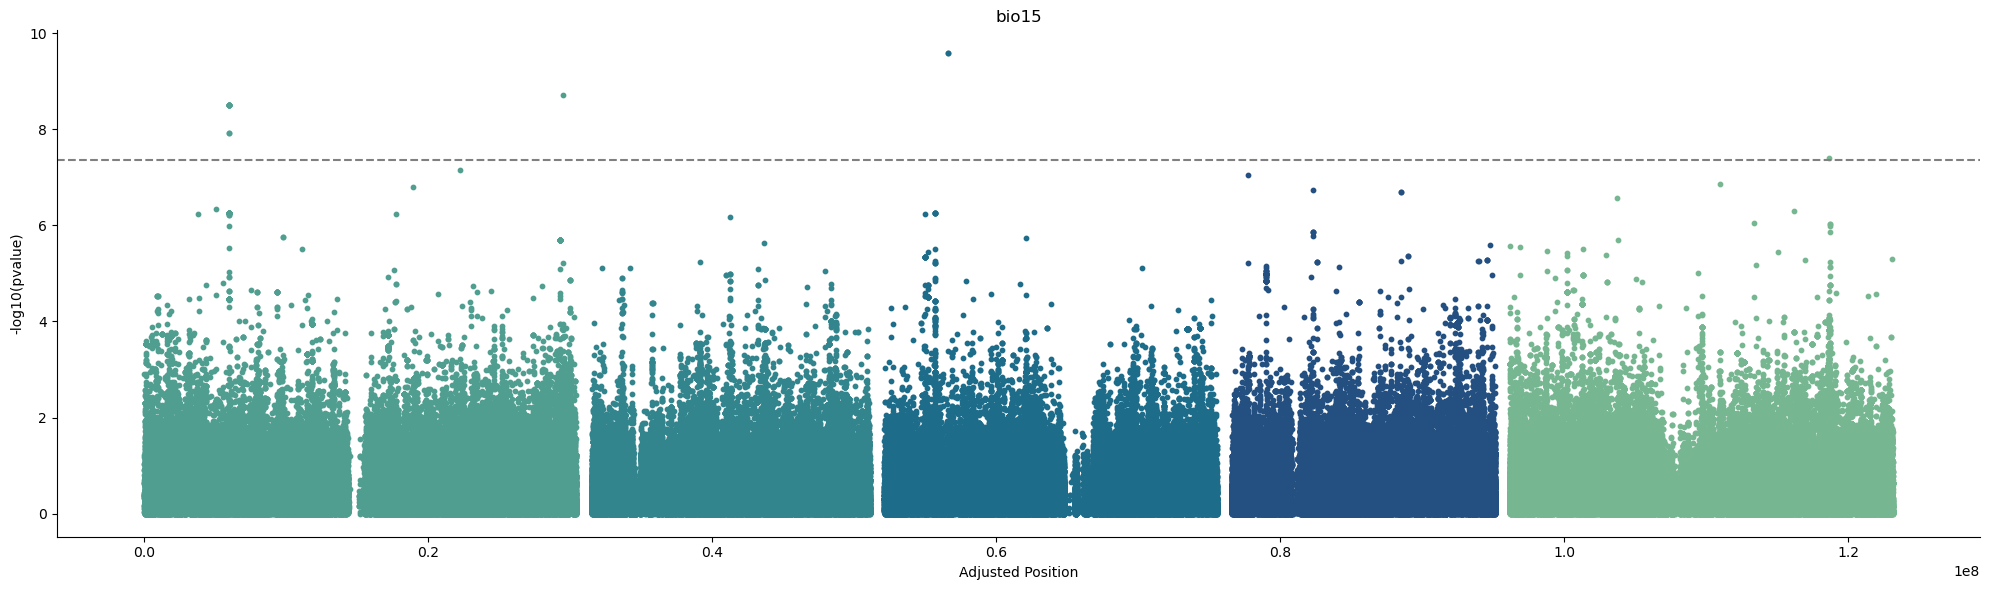

/tmp/ipykernel_4092025/3121438498.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


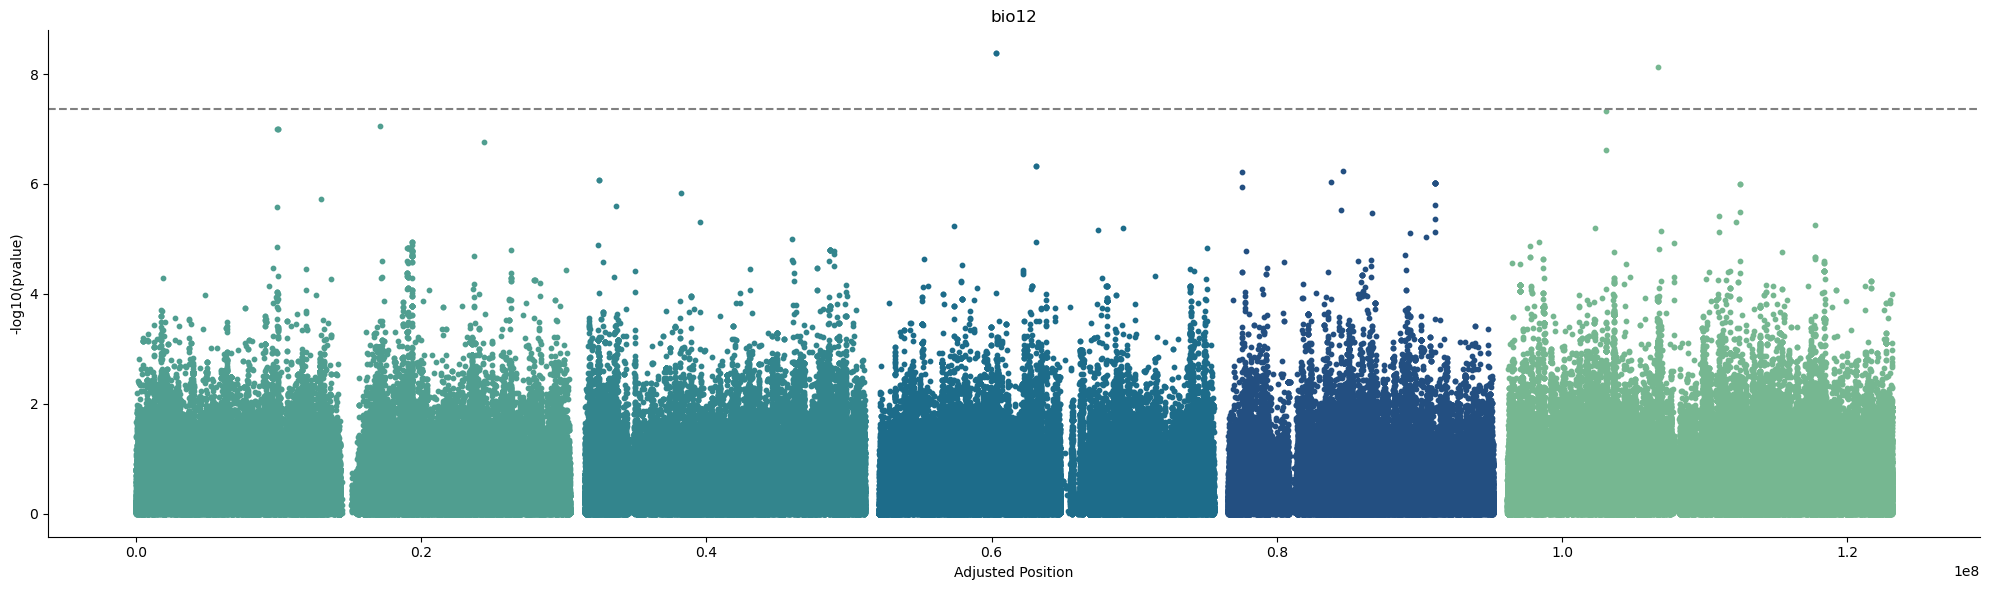

/tmp/ipykernel_4092025/3121438498.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


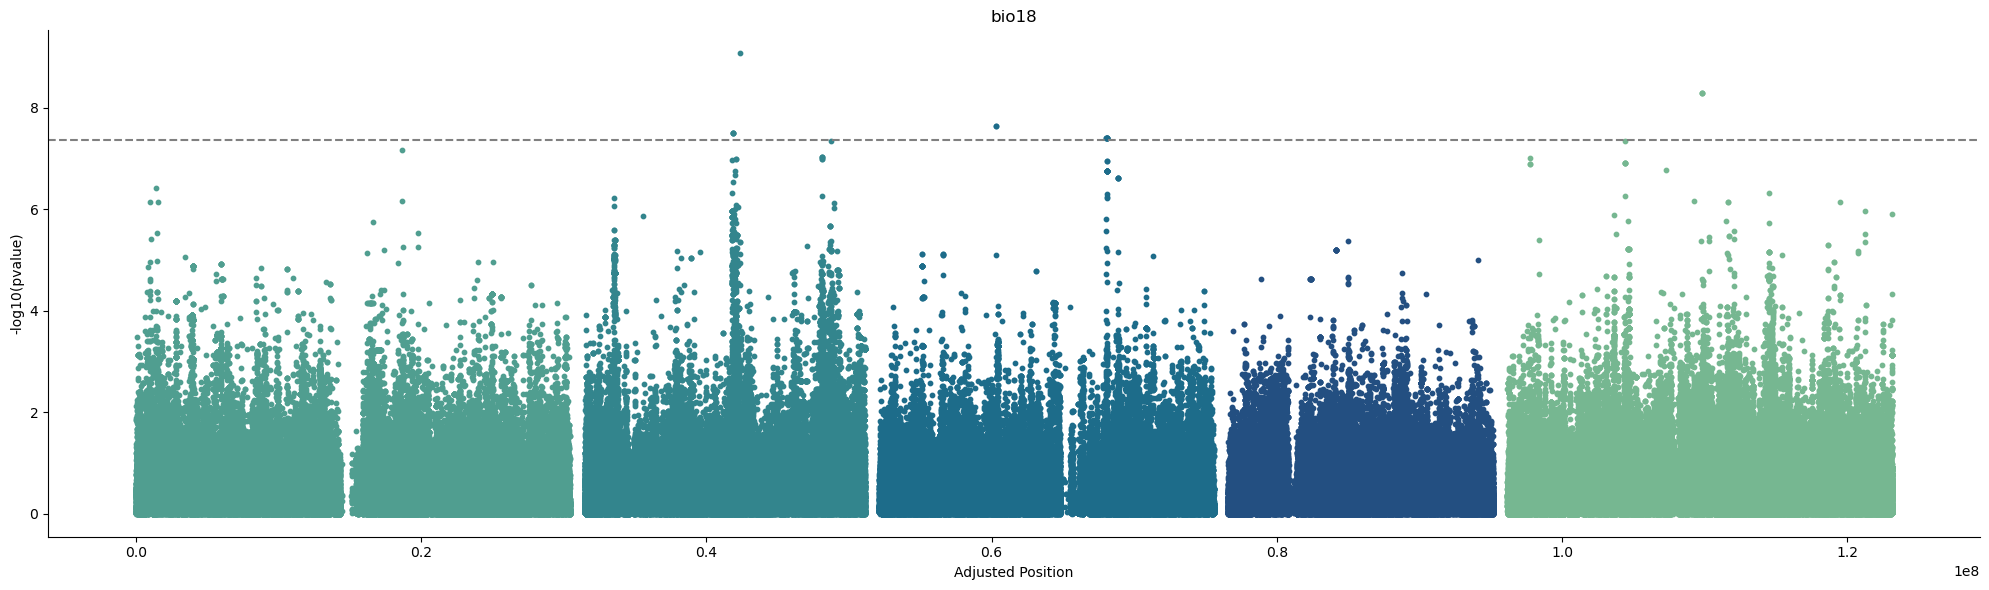

/tmp/ipykernel_4092025/3121438498.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


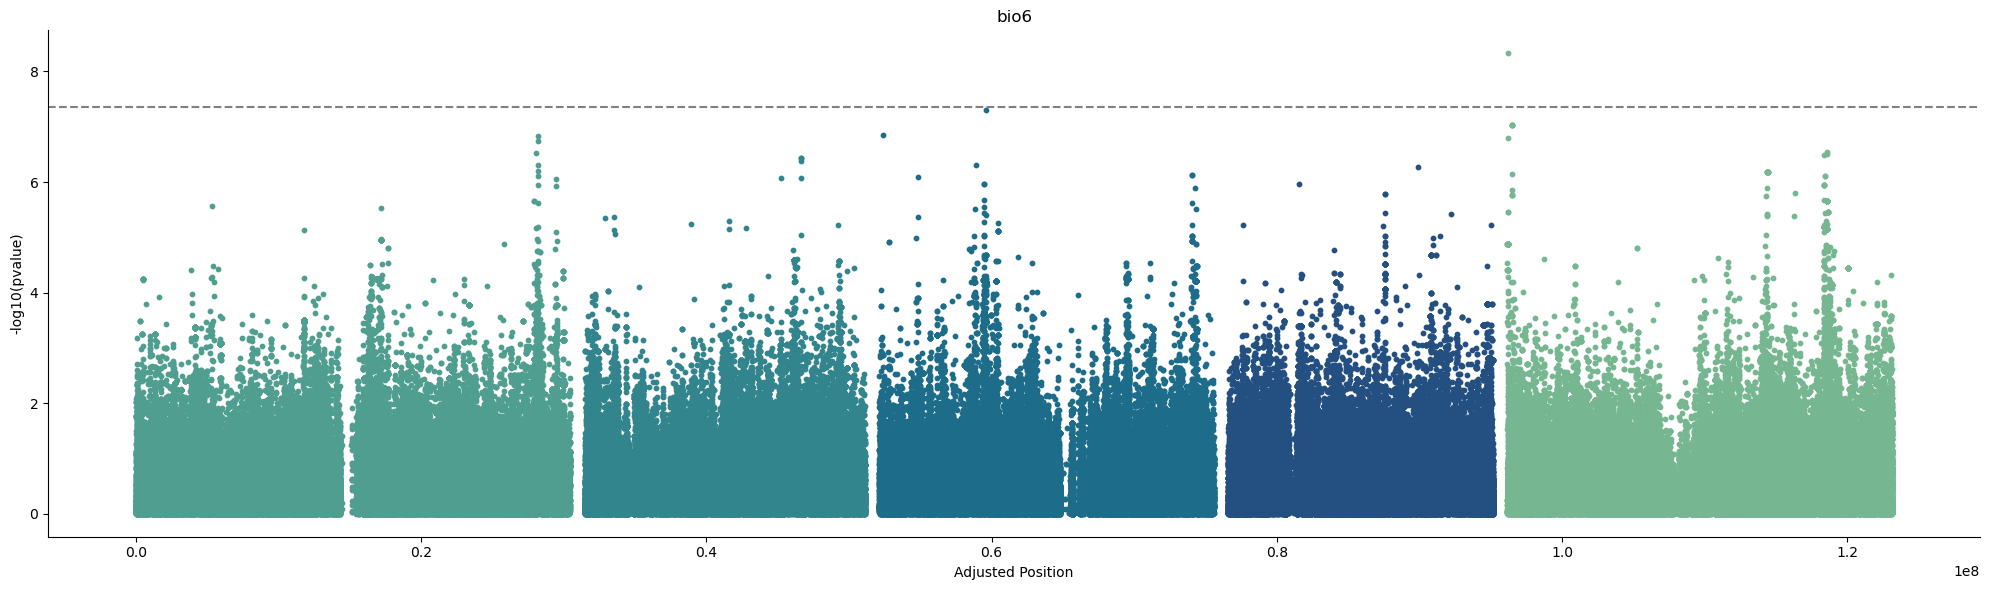

/tmp/ipykernel_4092025/3121438498.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


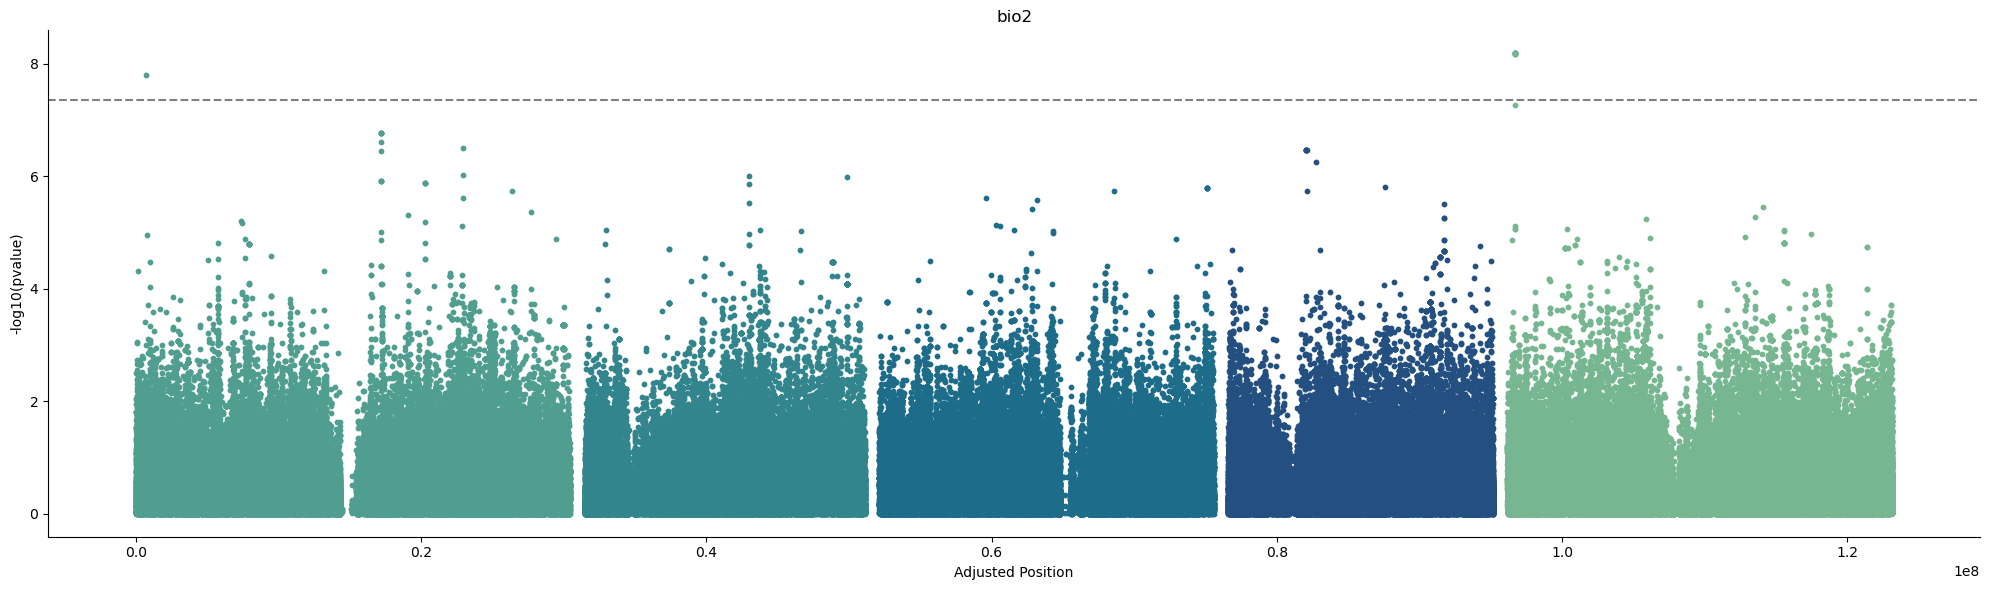

/tmp/ipykernel_4092025/3121438498.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


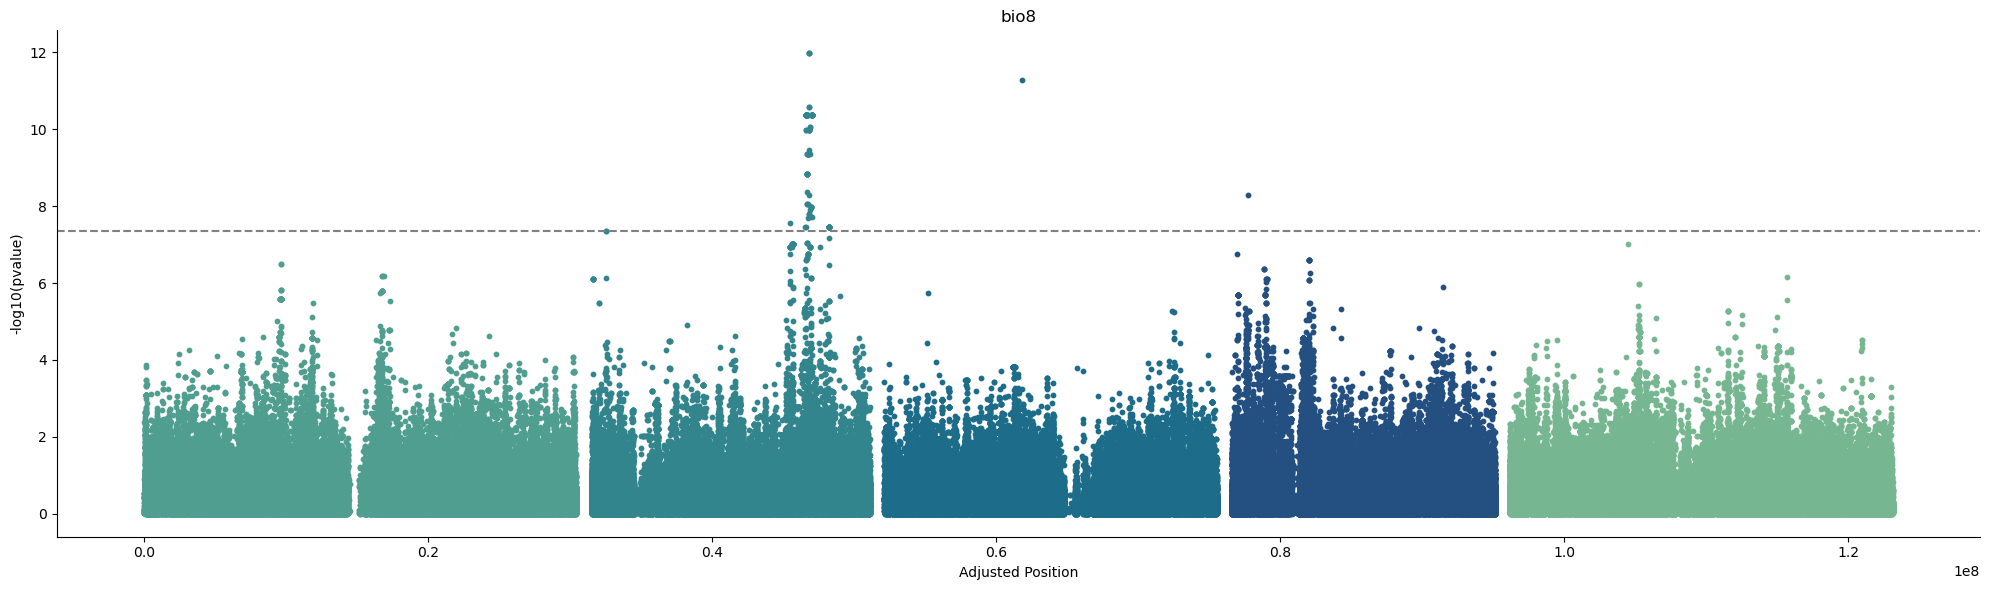

/tmp/ipykernel_4092025/3121438498.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


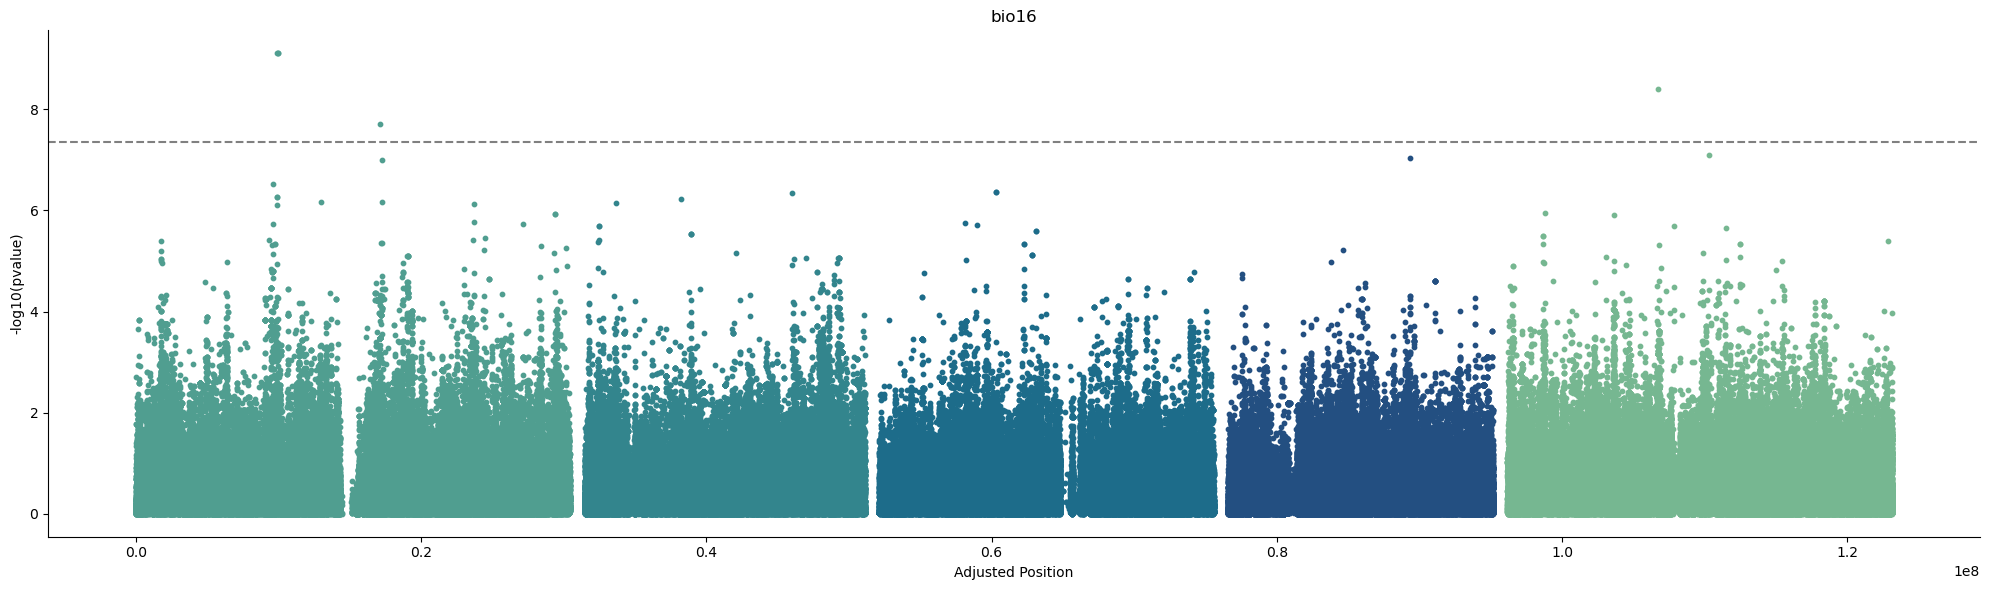

/tmp/ipykernel_4092025/3121438498.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


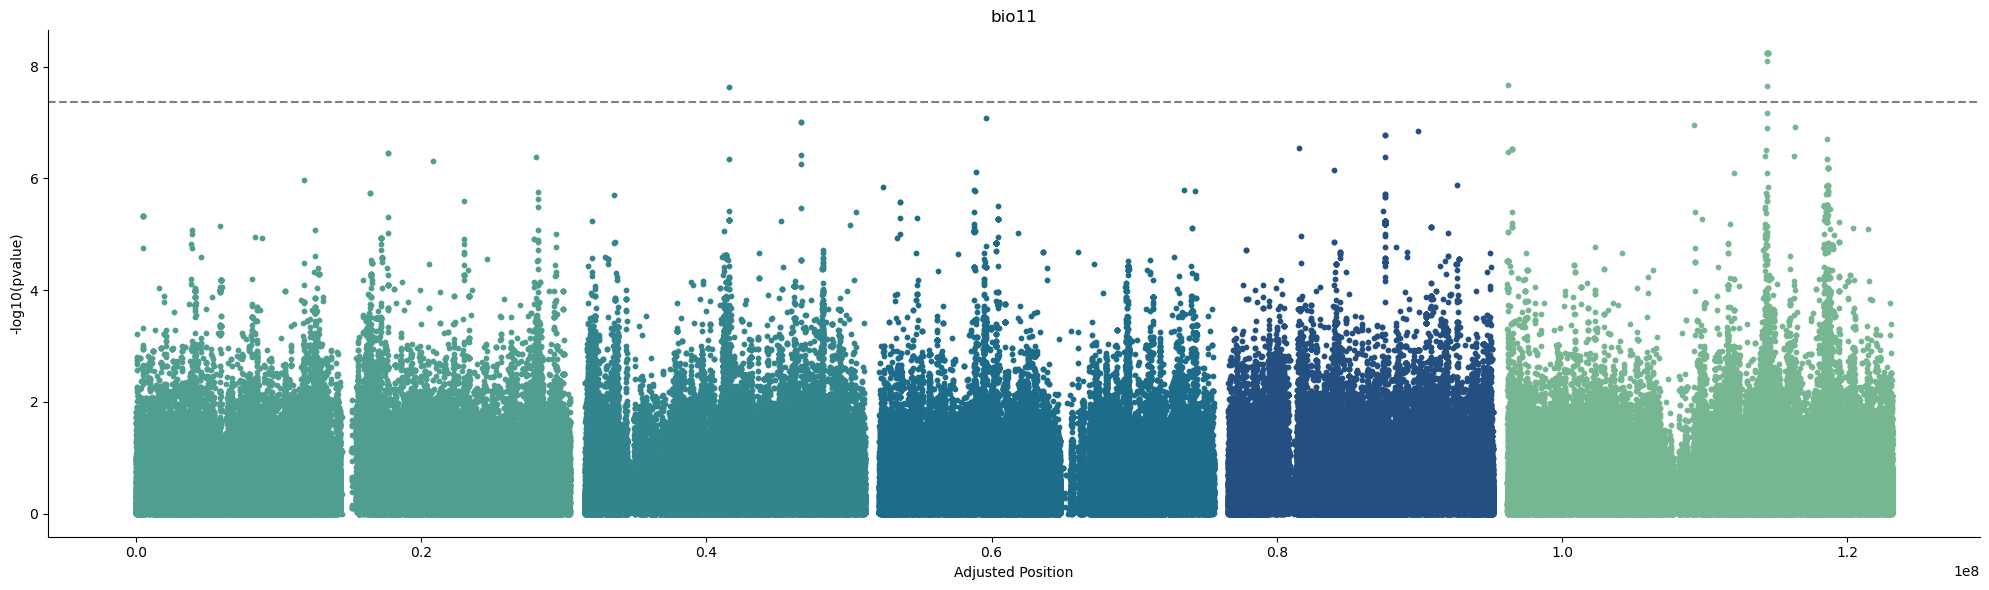

/tmp/ipykernel_4092025/3121438498.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


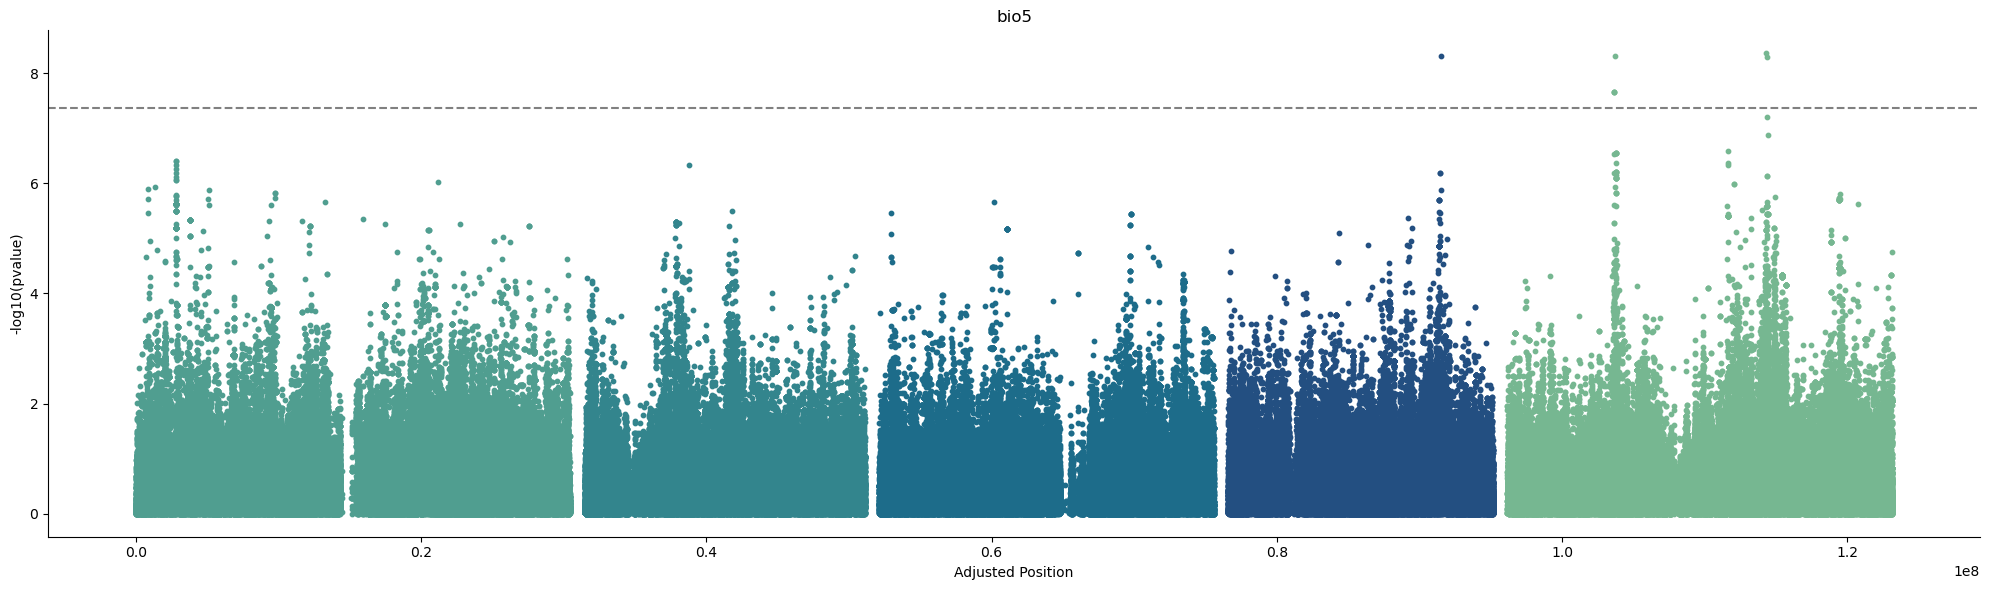

In [18]:
for biovar in biovars:    
    pvalues_file = path + f'/lmm_gemma/{biovar}/output/results_lmm.csv'
    
    pvalues = dd.read_csv(pvalues_file)
    pvalues = pvalues.compute()
    
    pvalues.columns = ['id', 'pvalue','beta', 'significant', 'blocks', 'af']
    
    threshold_value = 0.05 / len(pvalues)
    
    #sm.qqplot(pvalues['pvalue'], line ='45') 
    #py.show() 
    
    df = pvalues.copy()
    
    colors = sns.color_palette("crest", n_colors = 5)
    
    # Parsing chromosome number and position
    df['chromosome'] = df['id'].str.split('_').str[0].astype(int)
    df['position'] = df['id'].str.split('_').str[1].astype(int)
    df['-log10(pvalue)'] = -np.log10(df['pvalue'])
    
    # Calculate the offset for each chromosome to prevent overlap
    chromosome_offsets = {}
    offset = 0
    for chrom in sorted(df['chromosome'].unique()):
        chromosome_offsets[chrom] = offset
        max_position = df[df['chromosome'] == chrom]['position'].max()
        offset += max_position + 1000000  # Adding 1 million as a buffer between chromosomes
    
    # Apply offsets to positions
    df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)
    
    # Creating the Manhattan plot
    plt.figure(figsize=(20, 6))
    
    for chrom in sorted(df['chromosome'].unique()):
        subset = df[df['chromosome'] == chrom]
        plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)
    
    # Aesthetics
    plt.xlabel('Adjusted Position')
    plt.ylabel('-log10(pvalue)')
    #plt.title('Manhattan Plot')
    #plt.grid(axis='y')
    #plt.legend(title="Chromosome", bbox_to_anchor=(1.05, 1), loc='upper left')
    ax = plt.gca()  # Get current axes
    ax.spines['top'].set_visible(False)  # Remove the top spine
    ax.spines['right'].set_visible(False)
    # Threshold line (optional)
    threshold = -np.log10(threshold_value)
    plt.axhline(y=threshold, color='grey', linestyle='dashed')
    plt.title(f'{biovar}')  # Set the title

    # Show the plot
    plt.tight_layout()
    #plt.savefig(path + f'/lmm_gemma/{biovar}/output/manhattan.png')
    plt.show()